In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
def load_data():
    email_data = pd.read_csv('email_data.csv', parse_dates=True, index_col=0)
    file_data = pd.read_csv('file_data.csv', parse_dates=True, index_col=0)
    web_data = pd.read_csv('web_data.csv', parse_dates=True, index_col=0)
    login_data = pd.read_csv('login_data.csv', parse_dates=True, index_col=0)
    usb_data = pd.read_csv('usb_data.csv', parse_dates=True, index_col=0)
    employee_data = pd.read_csv('employee_data.csv', index_col=0)

    email_data['datetime'] = pd.to_datetime(email_data['datetime'])
    file_data['datetime'] = pd.to_datetime(file_data['datetime'])
    web_data['datetime'] = pd.to_datetime(web_data['datetime'])
    login_data['datetime'] = pd.to_datetime(login_data['datetime'])
    usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data()



Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.


In [3]:
finance_user = []
for i, j in enumerate(employee_data['role'].values):
    if j == 'Finance':
        finance_user.append(employee_data['user'].iloc[i])

In [4]:
len(finance_user)

38

In [5]:
finance_df = login_data[login_data['user'].isin(finance_user)]

In [6]:
# extracting finance df for month of january

finance_df = finance_df[finance_df['datetime'].dt.month == 1]

In [7]:
finance_df.shape

(2418, 4)

In [8]:
#creating a column where hour is displayed
finance_df['hour'] = finance_df['datetime'].dt.hour

Text(0.5, 1.0, 'Login and logoff count in unique hours')

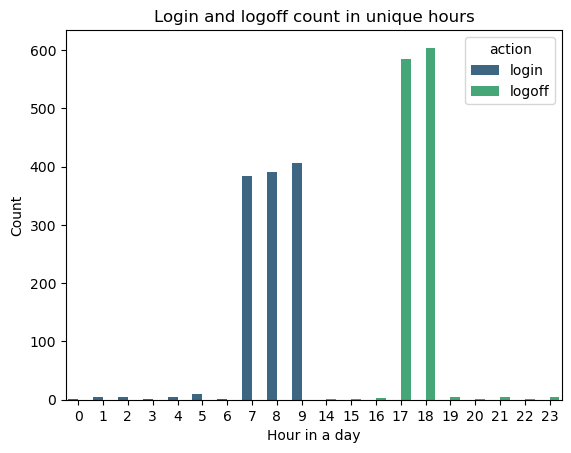

In [9]:
sns.countplot(x=finance_df['hour'],hue=finance_df['action'],palette='viridis')
plt.xlabel('Hour in a day')
plt.ylabel('Count')
plt.title('Login and logoff count in unique hours')

**Insight of Question 1**
* The most commom login time of the day is between 7 - 9
* The most common logoff time of the day is between 17-18

#### **Question 2**
##### Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

Hint: Filter the data as you need, and make two calls to plt.plot().


In [10]:
pc42 = login_data[login_data['pc'] == 'pc42']

In [11]:
# extracing pc42 login logoff for the month of january

pc42 = pc42[pc42['datetime'].dt.month == 1]

In [12]:
pc42_login = pc42[pc42['action'] == 'login']
pc42_login['day'] = pc42_login['datetime'].dt.day
pc42_login['hour'] = pc42_login['datetime'].dt.hour

pc42_logoff = pc42[pc42['action'] == 'logoff']
pc42_logoff['day'] = pc42_logoff['datetime'].dt.day
pc42_logoff['hour'] = pc42_logoff['datetime'].dt.hour

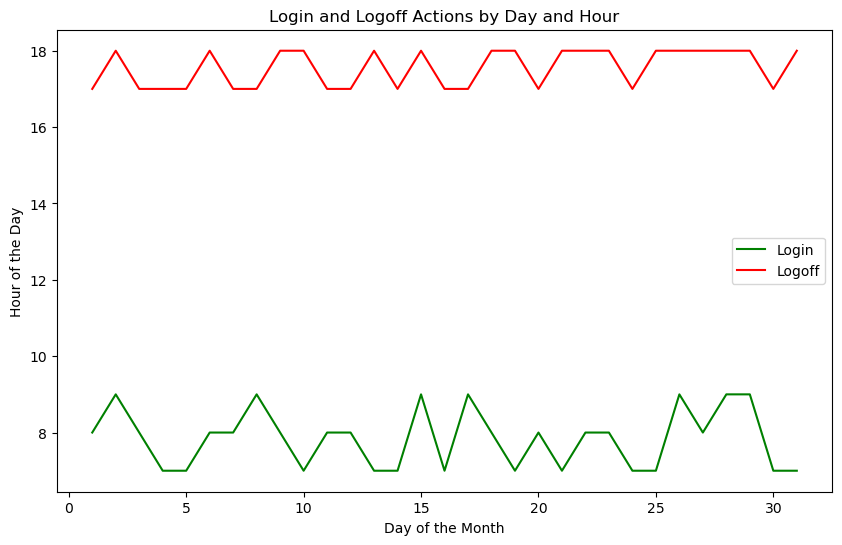

In [13]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot login actions
plt.plot(pc42_login['day'], pc42_login['hour'], label='Login', color='green')

# Plot logoff actions
plt.plot(pc42_logoff['day'], pc42_logoff['hour'], label='Logoff', color='red')

# Add labels, title, and legend
plt.xlabel('Day of the Month')
plt.ylabel('Hour of the Day')
plt.title('Login and Logoff Actions by Day and Hour')
plt.legend()

# Show the plot
plt.show()

### Question 3 
##### Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.
Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly
(1 mark)


In [14]:
email_data['sender_user'] = email_data['sender'].apply(lambda i: i.split('@')[0])

In [15]:
email_data['recipient_user'] = email_data['recipient'].apply(lambda i: i.split('@')[0])

In [16]:
email_data['sender_user_name'] = email_data['sender_user'].apply(lambda i: i.split('-')[1])
email_data['recipient_user_name'] = email_data['recipient_user'].apply(lambda i: i.split('-')[1])

In [17]:
security_staff = []
for i, j in enumerate(employee_data['role'].values):
    if j == 'Security':
        security_staff.append(employee_data['user'].iloc[i])

In [18]:
security_email_df = email_data[email_data['sender_user'].isin(security_staff)]

In [19]:
security_email_df = security_email_df[(security_email_df['datetime'].dt.month == 1) & (security_email_df['datetime'].dt.day == 5)]

In [20]:
usr_ijc = security_email_df[security_email_df['sender_user'] == 'usr-ijc']

In [21]:
usr_ijc = usr_ijc[['sender_user_name','recipient_user_name']]

In [22]:
import networkx as nx
import plotly.graph_objects as go


# Create the graph
G = nx.DiGraph()


# Add edges between security senders and their recipients
for _, row in usr_ijc.iterrows():
    G.add_edge(row["sender_user_name"], row["recipient_user_name"])

# Get positions for Plotly (using spring layout for better clarity)
pos = nx.spring_layout(G)

# Extract node positions
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
nodes = list(G.nodes())

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # None to create separate line segments
    edge_y.extend([y0, y1, None])

# Create Plotly traces
# Edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Nodes
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers+text',
    text=nodes,  # Display node labels
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        size=15,
        color='lightblue',
        line_width=2
    )
)

# Create the layout
layout = go.Layout(
    title='Interactive Node-Link Graph: Emails Sent by Security Staff usr_ijc (Jan 5, 2022)',
    title_x=0.5,
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=40, b=0),
    width = 1000,
    height = 600
)


# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the graph
fig.show()




### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

In [23]:
import networkx as nx
import plotly.graph_objects as go


# Create the graph
G = nx.DiGraph()

# Remove duplicate sender-recipient pairs
unique_email_df = security_email_df[["sender_user_name", "recipient_user_name"]].drop_duplicates()

# Add edges between security senders and their recipients
for _, row in unique_email_df.iterrows():
    G.add_edge(row["sender_user_name"], row["recipient_user_name"])

# Get positions for Plotly (using spring layout for better clarity)
pos = nx.spring_layout(G)

# Extract node positions
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
nodes = list(G.nodes())

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # None to create separate line segments
    edge_y.extend([y0, y1, None])

# Create Plotly traces
# Edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Nodes
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers+text',
    text=nodes,  # Display node labels
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        size=15,
        color='lightblue',
        line_width=2
    )
)

# Create the layout
layout = go.Layout(
    title='Interactive Node-Link Graph: Emails Sent by Security Staff (Jan 5, 2022)',
    title_x=0.5,
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=40, b=0),
    width = 1430,
    height = 800
)


# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the graph
fig.show()




### Question 5: 
##### Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.
Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.


In [24]:
hr_security_service_user = []
unique_roles = []
for i, j in enumerate(employee_data['role'].values):
    if j == 'Security' or j == 'HR' or j == 'Services':
        hr_security_service_user.append(employee_data['user'].iloc[i])
        unique_roles.append(employee_data['role'].iloc[i])

In [25]:
usr_role_dict = dict(zip(hr_security_service_user,unique_roles))

In [26]:
file_data.shape

(4014370, 3)

In [27]:
new_file_data = file_data[file_data['user'].isin(hr_security_service_user)]

In [28]:
new_file_data.shape

(956573, 3)

In [29]:
# Assign roles to users in 'new_file_data' based on 'usr_role_dict'
new_file_data['role'] = new_file_data['user'].map(usr_role_dict)

In [30]:
new_file_data = new_file_data[new_file_data['datetime'].dt.month == 1]

In [31]:
new_file_data.shape

(97355, 4)

In [32]:
new_file_data['filename'].unique()

array(['/security', '/security/estates', '/security/grounds',
       '/security/physical', '/docs', '/system/site', '/docs/clients',
       '/system/suppliers', '/system', '/private/staffreview', '/private',
       '/private/staffpay', '/docs/employment', '/docs/resignation'],
      dtype=object)

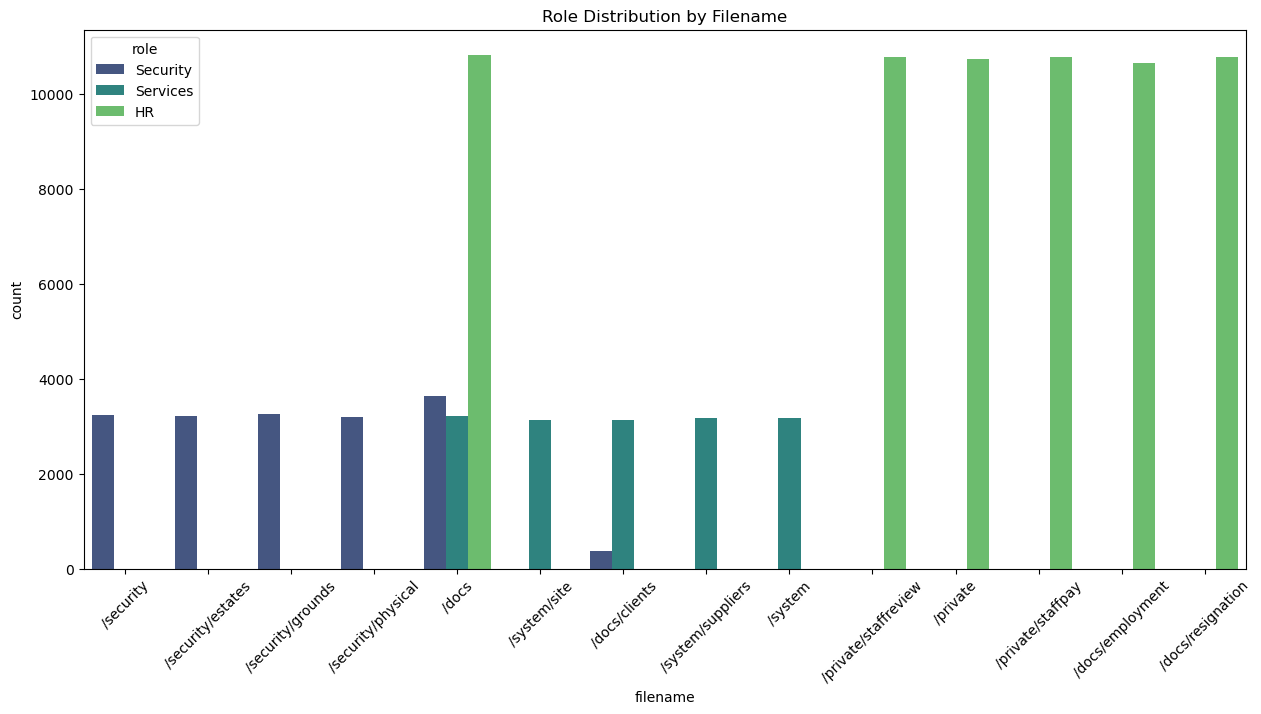

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(data=new_file_data,x='filename',hue='role',palette='viridis')
plt.xticks(rotation=45)
plt.title('Role Distribution by Filename') 
plt.show()

### Question 6: 
##### Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.
Marks are awarded for: 
•	a clear explanation of the steps you take to complete your investigation (5)
•	suitable use of data analysis with clear explanation (6)
•	suitable use of visualisation methods with clear annotation (6)
•	identifying all of the suspicious events (8)

In [34]:
new_file_data[(new_file_data['filename'] == '/docs/clients') & (new_file_data['role'] == 'Security')]['user'].value_counts()

user
usr-zvn    383
Name: count, dtype: int64

In [35]:
new_file_data2 = file_data[file_data['user'].isin(hr_security_service_user)]
new_file_data2['role'] = new_file_data2['user'].map(usr_role_dict)

In [36]:
new_file_data2.shape

(956573, 4)

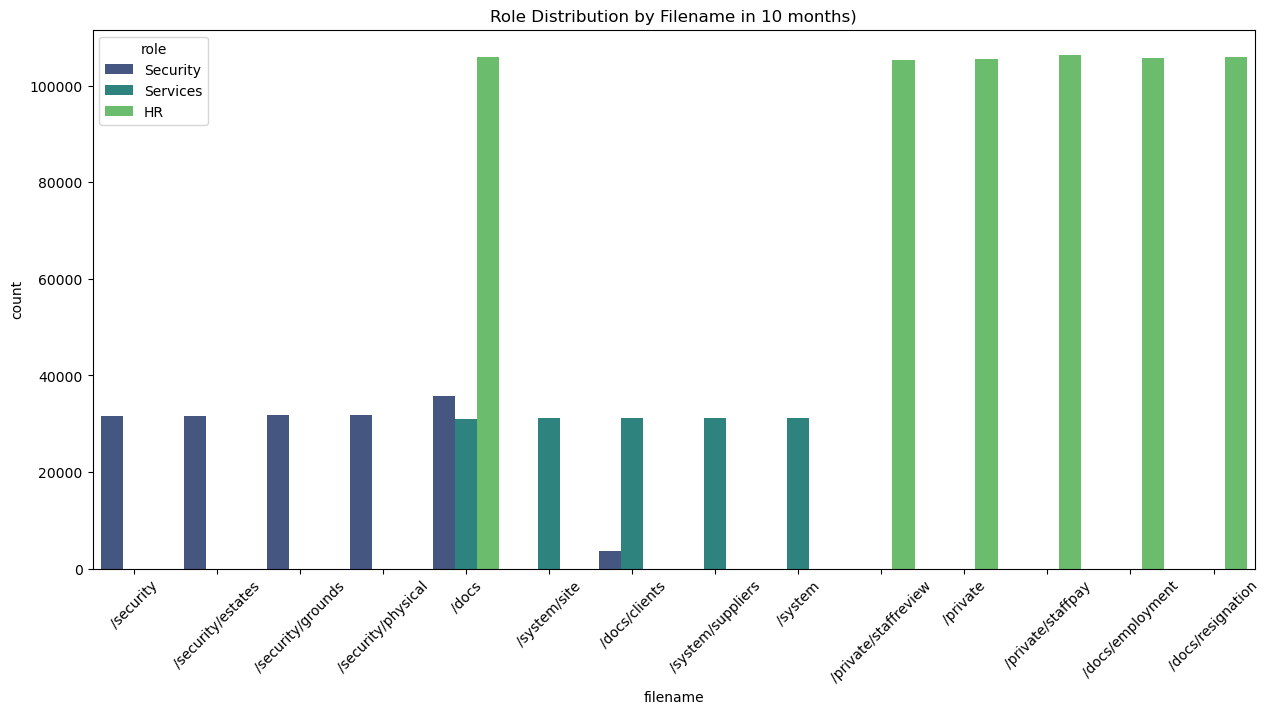

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(data=new_file_data2,x='filename',hue='role',palette='viridis')
plt.xticks(rotation=45)
plt.title('Role Distribution by Filename in 10 months)') 
plt.show()

In [38]:
new_file_data2[(new_file_data2['filename'] == '/docs/clients') & (new_file_data2['role'] == 'Security')]['user'].value_counts()

user
usr-zvn    3716
Name: count, dtype: int64

### **Insight**
* **Only usr-zvn from security depratment has visited /docs/clients file 3716 times during whole year which is very suspicious**

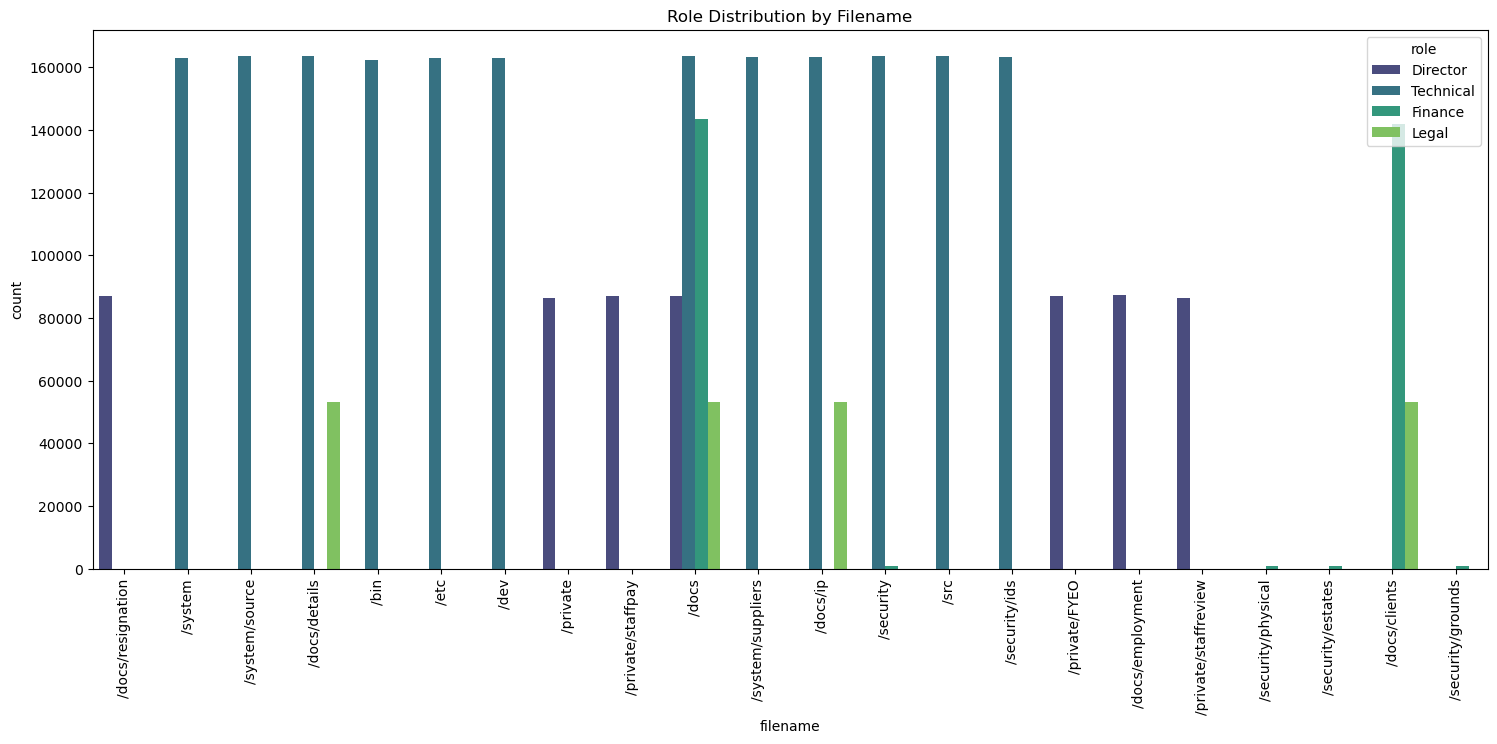

In [39]:
finance_legal_technical_director_user = []
unique_roles_2 = []
for i, j in enumerate(employee_data['role'].values):
    if j == 'Finance' or j == 'Legal' or j == 'Technical' or j == 'Director':
        finance_legal_technical_director_user.append(employee_data['user'].iloc[i])
        unique_roles_2.append(employee_data['role'].iloc[i])

usr_role_dict2 = dict(zip(finance_legal_technical_director_user, unique_roles_2))

new_file_data3 = file_data[file_data['user'].isin(finance_legal_technical_director_user)]

new_file_data3['role'] = new_file_data3['user'].map(usr_role_dict2)

plt.figure(figsize=(18,7))
sns.countplot(data=new_file_data3,x='filename',hue='role',palette='viridis')
plt.xticks(rotation=90)
plt.title('Role Distribution by Filename') 
plt.show()

In [40]:
new_file_data3[(new_file_data3['filename'] == '/security') & (new_file_data3['role'] == 'Finance')]['user'].value_counts()

user
usr-zvn    891
Name: count, dtype: int64

In [41]:
employee_data.head()

,user,role,email,pc
0,usr-lxm,Security,usr-lxm@uwetech.com,pc0
1,usr-vwj,Finance,usr-vwj@uwetech.com,pc1
2,usr-wql,HR,usr-wql@uwetech.com,pc2
3,usr-ysk,Security,usr-ysk@uwetech.com,pc3
4,usr-maq,Legal,usr-maq@uwetech.com,pc4


In [42]:
employee_data[employee_data['user'] == 'usr-zvn']['role'].unique()

array(['Security', 'Finance'], dtype=object)

In [43]:
multi_role = {}
for i, j in enumerate(employee_data['user']):
    count = len(employee_data[employee_data['user'] == j]['role'].unique())
    if count > 1:
        multi_role[j] = len(employee_data[employee_data['user'] == j]['role'].unique())

In [44]:
multi_role

{'usr-zvn': 2}

### **Insight**
* **usr-zvn is registered in 2 roles ie Finance and Security while other no employee is registered two roles in the whole company.**


In [45]:
email_data['hour'] = email_data['datetime'].dt.hour

In [46]:
email_data['mail_domain'] = email_data['sender'].apply(lambda i: i.split('@')[1])

In [47]:
email_data['mail_domain'].unique()

array(['uwetech.com'], dtype=object)

In [48]:
file_data['hour'] = file_data['datetime'].dt.hour

In [49]:
web_data['datetime'].max()

Timestamp('2022-10-31 23:47:39.642059')

In [50]:
web_data['website'].unique()

array(['http://www.ieeexplore.com', 'http://www.techforum.com',
       'http://www.python.com', 'http://www.guardian.com',
       'http://www.ebay.co.uk', 'http://www.stackoverflow.com',
       'http://www.wireshark.com', 'http://www.bbc.co.uk',
       'http://www.twitter.com', 'http://www.sky.com',
       'http://www.securityneeds.com', 'http://www.facebook.com',
       'http://www.l33thacker.com', 'http://www.google.com',
       'http://www.ilovesecurity.com', 'http://www.amazon.co.uk',
       'http://www.codeheaven.com', 'http://www.kalilinux.com',
       'http://www.l33tcoder.com', 'http://www.uwe.ac.uk',
       'http://www.mysecurityguard.net', 'http://www.findmyguard.co.uk',
       'http://www.icancode.com', 'http://www.localsecurity.net',
       'http://www.helpineedasecurity.net', 'http://www.gatehouse.com',
       'http://www.cateringcompany.com', 'http://www.linkedin.com',
       'http://www.moneysite.com', 'http://www.humanresourcesystem.com',
       'http://www.broadcaster.

In [51]:
suspicious_sites = ['http://www.l33thacker.com','http://www.ilovesecurity.com','http://www.l33tcoder.com','http://www.icancode.com','http://www.helpineedasecurity.net','http://www.mysecurityguard.net','http://www.ilovelaw.com','http://www.wireshark.com']

In [52]:
sus_web_df = web_data[web_data['website'].isin(suspicious_sites)]

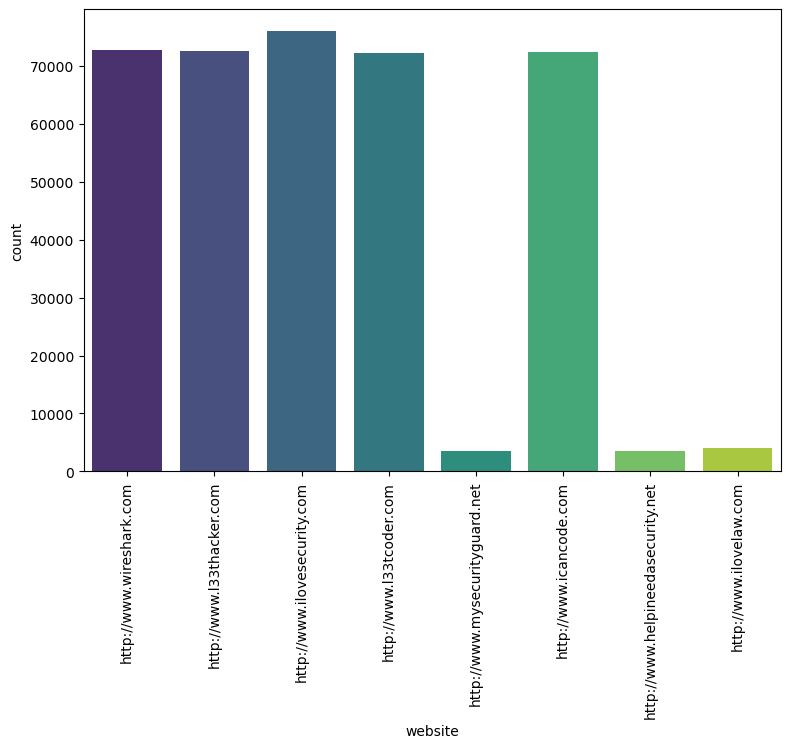

In [53]:
plt.figure(figsize=(9,6))
sns.countplot(data=sus_web_df,x='website',palette='viridis')
plt.xticks(rotation=90)
plt.show()

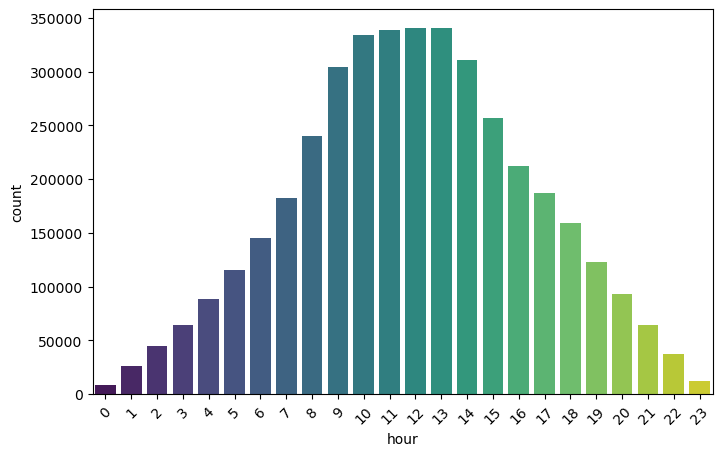

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(data=email_data,x='hour',palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [55]:
email_data[email_data['sender_user'] == 'usr-zvn']['recipient_user'].value_counts().nlargest(10)

recipient_user
usr-zvn    116
usr-min     98
usr-ccm     98
usr-nwg     94
usr-eaa     94
usr-bhs     92
usr-osd     91
usr-gli     89
usr-ler     88
usr-lji     88
Name: count, dtype: int64

#### **Insight**
* **usr-zvn has himself mailed 116 times which is quite unusual**

<Axes: xlabel='hour', ylabel='count'>

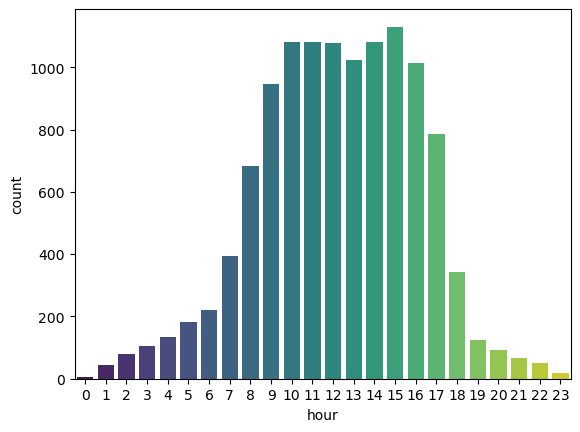

In [56]:
sns.countplot(x=email_data[email_data['sender_user'] == 'usr-zvn']['hour'],palette='viridis')

In [57]:
file_data.head()

,datetime,user,filename,hour
0,2022-01-01 00:02:58.366837,usr-xzo,/docs/resignation,0
1,2022-01-01 00:06:13.816940,usr-gnh,/system,0
2,2022-01-01 00:14:02.368707,usr-gnh,/system/source,0
3,2022-01-01 00:16:35.632220,usr-gnh,/system,0
4,2022-01-01 00:23:57.108002,usr-gnh,/docs/details,0


In [58]:
login_data['only_hour'] = login_data['datetime'].dt.hour

In [59]:
login_data.head()

,datetime,user,action,pc,only_hour
0,2022-01-01 00:00:30,usr-xzo,login,pc134,0
1,2022-01-01 00:05:56,usr-gnh,login,pc26,0
2,2022-01-01 00:11:09,usr-lxm,login,pc0,0
3,2022-01-01 00:14:09,usr-esy,login,pc246,0
4,2022-01-01 00:21:27,usr-wpq,login,pc210,0
